In [12]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
df = pd.read_csv('data/pkn.txt', delimiter=',')
df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>
0,PKN,D,19991126,0,15.268,15.403,14.715,15.194,15857000,0
1,PKN,D,19991129,0,15.124,15.194,14.852,14.923,5499196,0
2,PKN,D,19991130,0,15.060,15.330,15.060,15.194,3287087,0
3,PKN,D,19991201,0,15.330,15.674,15.194,15.674,3077747,0
4,PKN,D,19991202,0,15.818,16.297,15.745,15.954,3304014,0
...,...,...,...,...,...,...,...,...,...,...
5578,PKN,D,20220310,0,74.220,75.420,73.400,74.660,1292634,0
5579,PKN,D,20220311,0,74.660,77.800,74.200,77.600,1369221,0
5580,PKN,D,20220314,0,77.020,77.420,73.800,73.800,1759899,0
5581,PKN,D,20220315,0,74.200,75.740,73.400,75.000,1308018,0


In [3]:
df_copy = df.copy()
df_copy = df_copy.astype({'<DATE>': str})
for index, row in df.iterrows():
    string = str(row['<DATE>'])
    year = string[0:4]
    month = string[4:6]
    day = string[6:8]
    date = "-".join([year, month, day])
    df_copy.at[index, '<DATE>'] = date

df_copy

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>
0,PKN,D,1999-11-26,0,15.268,15.403,14.715,15.194,15857000,0
1,PKN,D,1999-11-29,0,15.124,15.194,14.852,14.923,5499196,0
2,PKN,D,1999-11-30,0,15.060,15.330,15.060,15.194,3287087,0
3,PKN,D,1999-12-01,0,15.330,15.674,15.194,15.674,3077747,0
4,PKN,D,1999-12-02,0,15.818,16.297,15.745,15.954,3304014,0
...,...,...,...,...,...,...,...,...,...,...
5578,PKN,D,2022-03-10,0,74.220,75.420,73.400,74.660,1292634,0
5579,PKN,D,2022-03-11,0,74.660,77.800,74.200,77.600,1369221,0
5580,PKN,D,2022-03-14,0,77.020,77.420,73.800,73.800,1759899,0
5581,PKN,D,2022-03-15,0,74.200,75.740,73.400,75.000,1308018,0


In [6]:
df_copy['<DATE>'][20: 21 + 20]

20    1999-12-27
21    1999-12-28
22    1999-12-29
23    2000-01-03
24    2000-01-04
25    2000-01-05
26    2000-01-06
27    2000-01-07
28    2000-01-10
29    2000-01-11
30    2000-01-12
31    2000-01-13
32    2000-01-14
33    2000-01-17
34    2000-01-18
35    2000-01-19
36    2000-01-20
37    2000-01-21
38    2000-01-24
39    2000-01-25
40    2000-01-26
Name: <DATE>, dtype: object

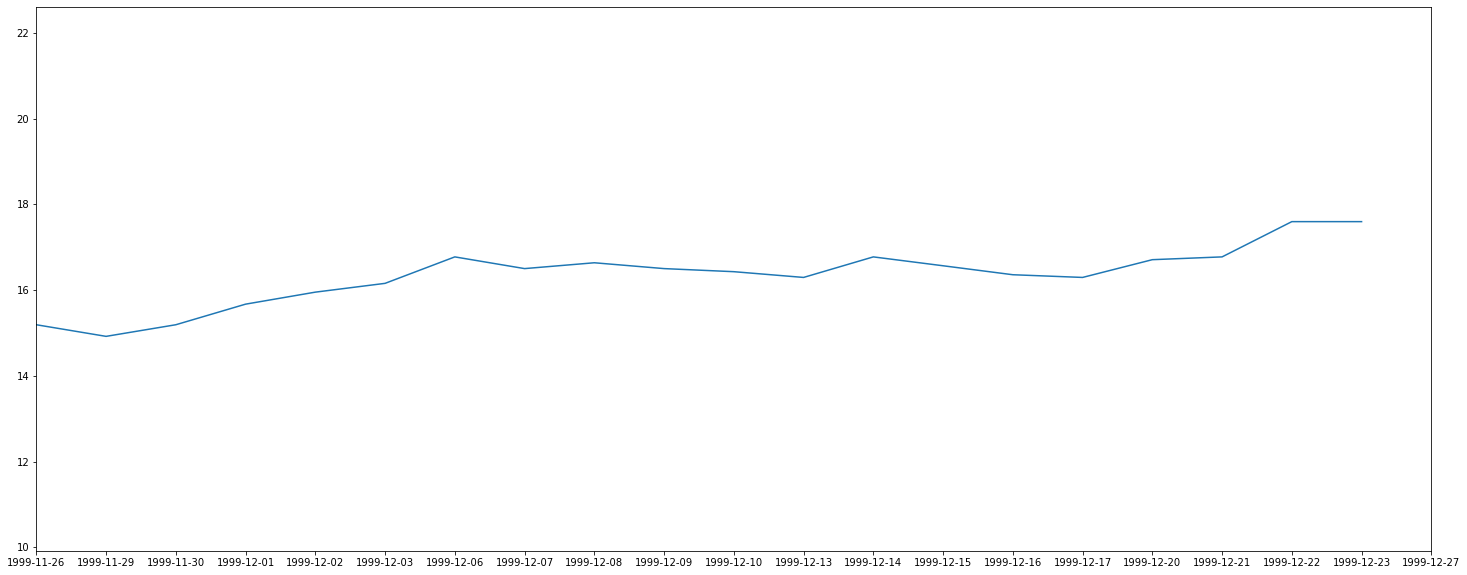

In [14]:
fig, ax = plt.subplots(figsize=(25, 10))

x = list(df_copy['<DATE>'])[0:20]
line, = ax.plot(x, list(df_copy['<CLOSE>'])[0:20])

def animate(i):
    start = 20 * i
    line.set_xdata(df_copy['<DATE>'][start:start + 20])
    line.set_ydata(df_copy['<CLOSE>'][start:start + 20])
    ax.set_xlim(df_copy['<DATE>'][start], df_copy['<DATE>'][start+20])
    ax.set_ylim(np.min(df_copy['<CLOSE>'][start:start + 20]) - 5, np.max(df_copy['<CLOSE>'][start:start + 20]) + 5)
    return line,

ani = animation.FuncAnimation(
    fig, animate, interval=20, frames=df.shape[0]//20, blit=True, save_count=50)

plt.show()